This file contains the initial attempts, including a very simple mlp and pca. 
NOTICE: only N400 data was used in this file.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy


X = pd.read_csv("New_X4000.csv")
#X = torch.tensor(file.values, requires_grad = True, dtype = torch.float)
Y = pd.read_csv("New_Y4000.csv")
#Y = torch.tensor(file1.values, requires_grad = True, dtype = torch.float)
print (X.shape)
print (Y.shape)
#X = X[:3861,:]
print (X.shape)

(7774, 30)
(7774, 1)
(7774, 30)


In [ ]:
b = np.where(np.isnan(X), 0, X)
b1 = np.where(np.isnan(Y), 0, Y)
X_train1 = torch.tensor(b, requires_grad = True, dtype = torch.float)
Y_train1 = torch.tensor(b1, requires_grad = True,dtype = torch.float)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.x = torch.tensor(X, requires_grad = True)
        self.y = torch.tensor(Y, requires_grad = True)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test1, Y_train2, Y_test1 = train_test_split(X_train1, Y_train1)
X_train3, X_val, Y_train3, Y_val = train_test_split(X_train2, Y_train2)

In [ ]:
data = MyDataset(X_train3, Y_train3)
dataloader = DataLoader(data, batch_size=10, shuffle=True)
data2 = MyDataset(X_test1, Y_test1)
dataloader2 = DataLoader(data2, batch_size=10, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [ ]:
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # F.sigmoid(self.layers(x))
        self.layers = torch.nn.Sequential(
            #nn.Sigmoid(),
            #nn.Linear(30,size),      
            #nn.Dropout(p=0.5),
            #nn.ReLU(),
            #nn.Linear(size,30)

            nn.Flatten(),
            nn.Linear(30, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
          )
        
    def forward(self,x):
        x = self.layers(x)
        return F.sigmoid(x)

In [ ]:
my_model = MyModel()

In [ ]:
loss_fn = nn.BCELoss(reduction='mean')
m = nn.Sigmoid()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
t_loss = []
v_loss = []
def train(epochs):
    optimizer = torch.optim.Adam(my_model.parameters(),lr=0.001)
    best_score = None
    best_acc = 0.0
    for epoch in range(epochs):
        
        my_model.train()
        
        running_loss = 0.
        val_loss = 0.
        running_corrects = 0.0
        
        for batch_x, batch_y in dataloader:
            optimizer.zero_grad()
            y_pred = my_model(batch_x)
            loss = loss_fn(y_pred, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            #print (((outputs >= 0.5) == labels.data).shape)
            running_corrects += torch.sum((y_pred >= 0.5) == batch_y.data)


        epoch_loss = running_loss / len(X_train3)
        epoch_acc = running_corrects.double() / len(X_train3)
        print('Loss: {:.4f}, Accurate: {:4f}'.format(epoch_loss, epoch_acc))

        # deep copy the model
        if epoch_acc > best_acc:
          best_acc = epoch_acc
          best_model_wts = copy.deepcopy(my_model.state_dict())

    my_model.load_state_dict(best_model_wts)            

   '''     my_model.eval()
        
        for batch_x, batch_y in dataloader2:
            y_pred = my_model(batch_x)
            loss = loss_fn(m(y_pred), m(batch_y))
            val_loss += loss.item()

        if not best_score:
            best_score = val_loss
            best_model_wts = copy.deepcopy(my_model.state_dict())
        if val_loss < best_score:
            best_score = val_loss
            best_model_wts = copy.deepcopy(my_model.state_dict())

        print('Train Loss: {:.4f}, Val Loss: {:4f}'.format(running_loss, val_loss))
        t_loss.append(running_loss)
        v_loss.append(val_loss)
  '''     

In [ ]:
train(40)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Loss: 0.0711, Accurate: 0.514867
Loss: 0.0695, Accurate: 0.536368
Loss: 0.0692, Accurate: 0.541857
Loss: 0.0690, Accurate: 0.544145
Loss: 0.0684, Accurate: 0.560842
Loss: 0.0681, Accurate: 0.567475
Loss: 0.0677, Accurate: 0.583486
Loss: 0.0674, Accurate: 0.576167
Loss: 0.0668, Accurate: 0.586002
Loss: 0.0665, Accurate: 0.590805
Loss: 0.0660, Accurate: 0.605215
Loss: 0.0654, Accurate: 0.605672
Loss: 0.0643, Accurate: 0.614593
Loss: 0.0634, Accurate: 0.626029
Loss: 0.0627, Accurate: 0.639982
Loss: 0.0621, Accurate: 0.648445
Loss: 0.0613, Accurate: 0.659195
Loss: 0.0600, Accurate: 0.671089
Loss: 0.0595, Accurate: 0.668801
Loss: 0.0587, Accurate: 0.676121
Loss: 0.0575, Accurate: 0.694876
Loss: 0.0565, Accurate: 0.698994
Loss: 0.0561, Accurate: 0.695334
Loss: 0.0550, Accurate: 0.710659
Loss: 0.0537, Accurate: 0.720723
Loss: 0.0534, Accurate: 0.712946
Loss: 0.0529, Accurate: 0.726670
Loss: 0.0513, Accurate: 0.730329
Loss: 0.0507, Accurate: 0.746112
Loss: 0.0505, Accurate: 0.741537
Loss: 0.04

In [ ]:
def check_accuracy(test_loader, model):
  num_correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for batch_x, batch_y in enumerate(test_loader):
      predictions = model(batch_x)
      num_correct += torch.sum((predictions >= 0.5) == batch_y.data)
      total += len(batch_y)
    print(float(num_correct)/float(total))

In [ ]:
check_accuracy(dataloader2, my_model)

AttributeError: ignored

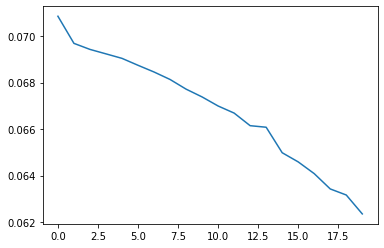

In [ ]:
plt.plot(t_loss)

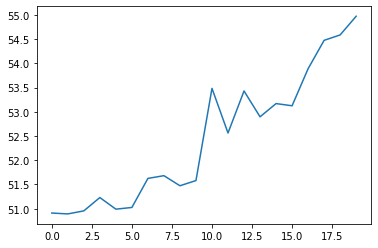

In [ ]:
plt.plot(v_loss)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import torch

def tensorTo2D(tensor):
    return tensor.reshape(tensor.shape[0], -1)

file = pd.read_csv("New_X.csv")
X_train = torch.tensor(file.values, dtype = torch.float)
file1 = pd.read_csv("New_Y.csv")
Y_train = torch.tensor(file1.values, dtype = torch.float)


In [ ]:
X_train = X_train + 53

In [ ]:
print(X_train)

tensor([[22.1700, 37.9800, 44.6200,  ..., 13.2800,  9.0600, 14.7100],
        [23.4400, 26.6100, 32.9700,  ..., 32.0900, 31.9200, 31.5000],
        [24.7000, 24.9300, 22.3400,  ..., 42.2200, 52.2800, 60.8700],
        ...,
        [79.0500, 74.6500, 70.8800,  ..., 62.4800, 59.2600, 60.3500],
        [84.3300, 80.2100, 83.6000,  ..., 88.2600, 79.1200, 78.3000],
        [85.2300, 57.9500, 60.9100,  ..., 56.9900, 47.1500, 55.0900]])


In [ ]:
b = np.where(np.isnan(X_train), 0, X_train)

In [ ]:
X_train = torch.tensor(b, dtype = torch.float)
torch.min(X_train)

tensor(-37.4000)

In [ ]:
print(X_train)

tensor([[22.1700, 37.9800, 44.6200,  ..., 13.2800,  9.0600, 14.7100],
        [23.4400, 26.6100, 32.9700,  ..., 32.0900, 31.9200, 31.5000],
        [24.7000, 24.9300, 22.3400,  ..., 42.2200, 52.2800, 60.8700],
        ...,
        [79.0500, 74.6500, 70.8800,  ..., 62.4800, 59.2600, 60.3500],
        [84.3300, 80.2100, 83.6000,  ..., 88.2600, 79.1200, 78.3000],
        [85.2300, 57.9500, 60.9100,  ..., 56.9900, 47.1500, 55.0900]])


In [ ]:
# model training
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_2d = pca.transform(X_train)

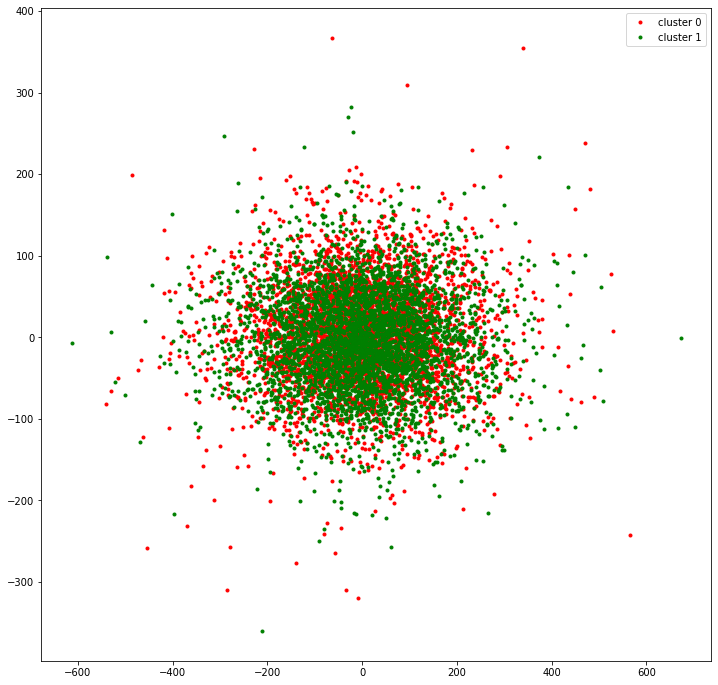

In [ ]:
# visualization
cc='rg'
plt.figure(figsize=(12, 12))
for label in range(len(cc)):
    index = Y_train[:,0]==label
    plt.plot(X_train_2d[index,0], X_train_2d[index,1], cc[label]+'.')

plt.legend(['cluster %d'%x for x in range(len(cc))])